# 27. Автоэнкодеры. Что это и как работают

In [1]:
import os

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.datasets import mnist
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Reshape, Input

2024-11-15 22:11:50.427370: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-11-15 22:11:50.585264: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-11-15 22:11:50.630654: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

#стандартизация данных
x_train = x_train / 255
x_test = x_test / 255

x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

In [3]:
input_img = Input((28, 28, 1))

x = Flatten()(input_img)
x = Dense(128, activation='relu')(x)
x = Dense(64, activation='relu')(x)
encoded = Dense(49, activation='relu')(x)

d = Dense(64, activation='relu')(encoded)
d = Dense(28*28, activation='sigmoid')(d)
decoded = Reshape((28, 28, 1))(d)

autoencoder = keras.Model(input_img, decoded, name='autoencoder')
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

In [4]:
batch_size = 100

autoencoder.fit(x_train, x_train,
                epochs=20,
                batch_size=batch_size,
                shuffle=True)

Epoch 1/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0711
Epoch 2/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0218
Epoch 3/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0171
Epoch 4/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0145
Epoch 5/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0131
Epoch 6/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0121
Epoch 7/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0114
Epoch 8/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0108
Epoch 9/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0103
Epoch 10/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0100
Epoch 11/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0097
Epoch 12/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0095
Epoch 13/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0092
Epoch 14/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0090
Epoch 15/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - lo

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


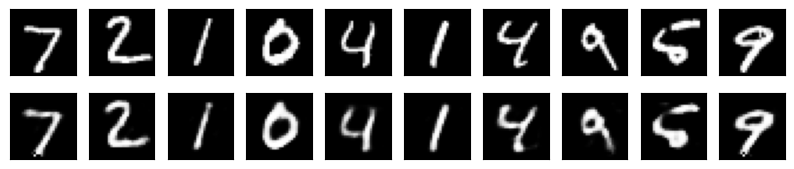

In [5]:
n = 10
imgs = x_test[:n]
decoded_imgs = autoencoder.predict(x_test[:n], batch_size=n)

plt.figure(figsize=(n, 2))
for i in range(n):
    ax = plt.subplot(2, n, i+1)
    plt.imshow(imgs[i].squeeze(), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    ax2 = plt.subplot(2, n, i+n+1)
    plt.imshow(decoded_imgs[i].squeeze(), cmap='gray')
    ax2.get_xaxis().set_visible(False)
    ax2.get_yaxis().set_visible(False)

In [6]:
def plot_digits(*images):
  images = [x.squeeze() for x in images]
  n = images[0].shape[0]  # число изображений

  plt.figure(figsize=(n, len(images)))
  for j in range(n):
    for i in range(len(images)):
      ax = plt.subplot(len(images), n, i * n + j + 1)
      plt.imshow(images[i][j])
      plt.gray()
      ax.get_xaxis().set_visible(False)
      ax.get_yaxis().set_visible(False)

  plt.show()


def plot_homotopy(frm, to, n=10, autoencoder=None):
  z = np.zeros(([n] + list(frm.shape)))
  for i, t in enumerate(np.linspace(0., 1., n)):
    z[i] = frm * (1 - t) + to * t  # Гомотопия по прямой
  if autoencoder:
    plot_digits(autoencoder.predict(z, batch_size=n))
  else:
    plot_digits(z)


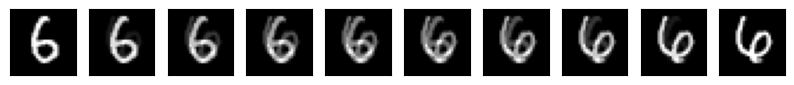

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


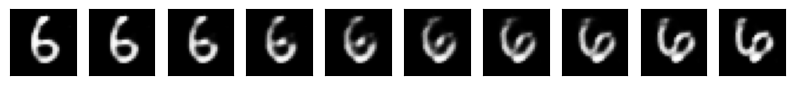

In [8]:
frm, to = x_test[y_test == 6][1:3]
plot_homotopy(frm, to)
plot_homotopy(frm, to, autoencoder=autoencoder)